VGGNet19

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Sequential

In [4]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            #print(j)
            for k in os.listdir(Path_train_Dataset+"/"+j):
                img=cv2.imread(Path_train_Dataset+"/"+j+"/"+k)
                Input_train_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    #print('0 Entered ',j)
                    Output_train.append(int(0))
                elif(j == 'ewer'):
                    #print('1 Entered ',j)
                    Output_train.append(int(1))
                elif(j == 'helicopter'):
                    #print('2 Entered ',j)
                    Output_train.append(int(2))
                elif(j == 'scorpion'):
                    #print('3 Entered ',j)
                    Output_train.append(int(3))
                else:
                    #print('4 Entered ',j)
                    Output_train.append(int(4))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                img=cv2.imread(Path_test_Dataset+"/"+j+"/"+k)
                Input_test_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_test.append(int(0))
                elif(j == 'ewer'):
                    Output_test.append(int(1))
                elif(j == 'helicopter'):
                    Output_test.append(int(2))
                elif(j == 'scorpion'):
                    Output_test.append(int(3))
                else:
                    Output_test.append(int(4))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                img=cv2.imread(Path_val_Dataset+"/"+j+"/"+k)
                Input_val_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_val.append(int(0))
                elif(j == 'ewer'):
                    Output_val.append(int(1))
                elif(j == 'helicopter'):
                    Output_val.append(int(2))
                elif(j == 'scorpion'):
                    Output_val.append(int(3))
                else:
                    Output_val.append(int(4))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/content/drive/MyDrive/DLA5/Group_1"


#calling Upload_Dataset function
trainInp, testInp,valInp, trainOut, testOut, valOut= Upload_Dataset(Dataset_Path)



In [5]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

In [7]:
from keras.applications.vgg19 import VGG19

In [8]:
vgg19=VGG19(weights="imagenet")
for layer in vgg19.layers:
    layer.trainable = False
vgg19.summary()

574710816/574710816 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [9]:
x = vgg19.get_layer('fc2').output
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=2,verbose=1)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(x = trainInp, y = trainOut, batch_size = 32, epochs = 100, verbose = "auto", callbacks=[es], validation_data=(valInp,  valOut), validation_batch_size=1)

Epoch 1/100
8/8 [==============================] - 32s 4s/step - loss: 0.8815 - accuracy: 0.7480 - val_loss: 0.1457 - val_accuracy: 0.9600
Epoch 2/100
8/8 [==============================] - 34s 4s/step - loss: 0.0179 - accuracy: 0.9960 - val_loss: 0.1566 - val_accuracy: 0.9600
Epoch 3/100
8/8 [==============================] - 33s 4s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9400
Epoch 4/100
8/8 [==============================] - 34s 4s/step - loss: 8.4844e-04 - accuracy: 1.0000 - val_loss: 0.1557 - val_accuracy: 0.9400
Epoch 5/100
8/8 [==============================] - 36s 5s/step - loss: 5.2305e-04 - accuracy: 1.0000 - val_loss: 0.1521 - val_accuracy: 0.9400
Epoch 6/100
8/8 [==============================] - 39s 5s/step - loss: 3.8676e-04 - accuracy: 1.0000 - val_loss: 0.1486 - val_accuracy: 0.9400
Epoch 7/100
8/8 [==============================] - 42s 5s/step - loss: 3.2569e-04 - accuracy: 1.0000 - val_loss: 0.1449 - val_accuracy: 0.9400
Epoch 8/100

In [ ]:
model.save('vgg19.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainInp,y=trainOut,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valInp, y=valOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testInp, y=testOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testInp, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)


#3-3
confusionMatrix=tf.math.confusion_matrix(testOut,pred)
print(confusionMatrix)

In [10]:
img=trainInp[2]

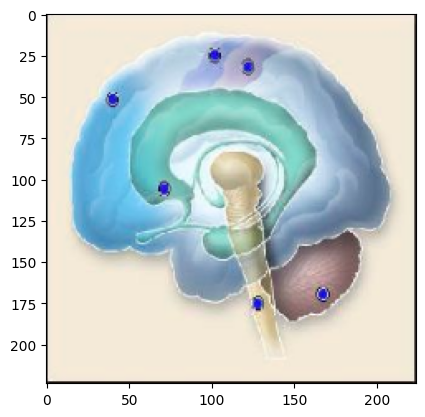

In [11]:
plt.imshow(img)

In [12]:
#img=trainInp[0]
modelConv1 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block1_conv1').output)
conv1FM = modelConv1.predict(trainInp)
print(conv1FM.shape)

8/8 [==============================] - 4s 491ms/step
(250, 224, 224, 64)


In [ ]:
model.summary()

In [13]:
weight,bias=model.get_layer('block5_conv1').get_weights()
weight.shape

(3, 3, 512, 512)

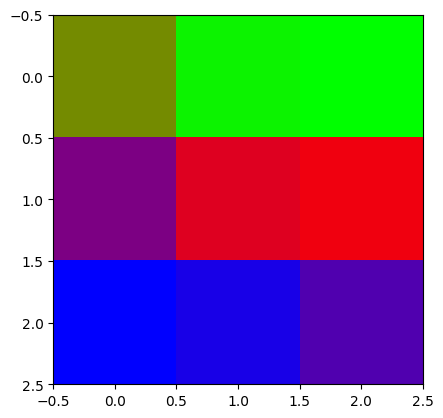

In [14]:
plt.imshow(weight[:,:,3,63],cmap='brg')

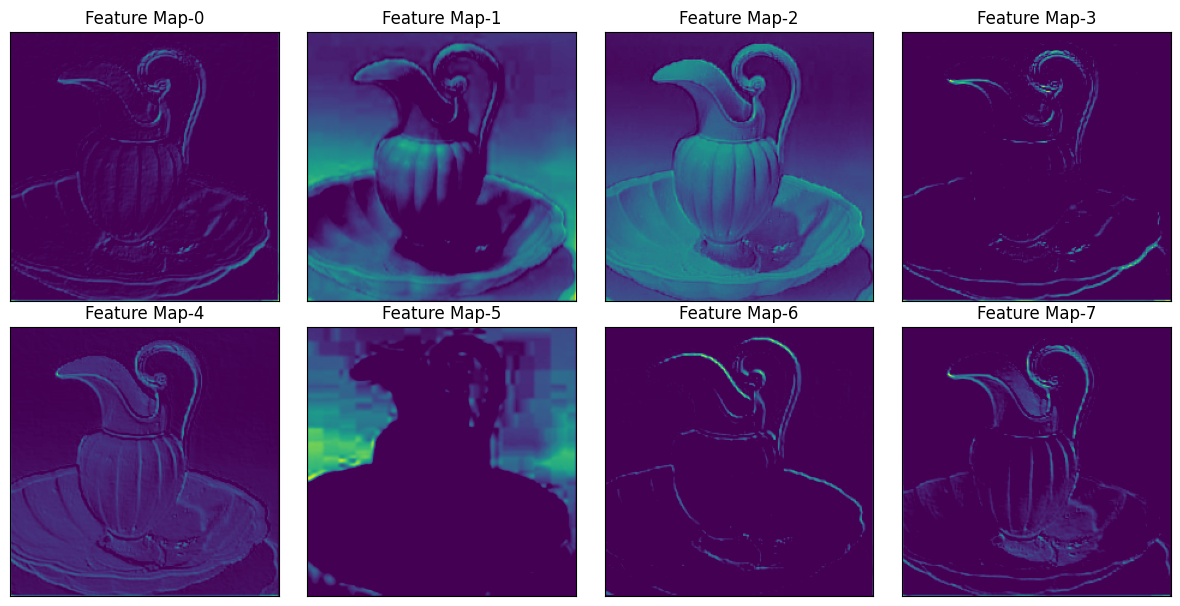

In [15]:
plt.figure(figsize=(15,15))
for i in range(8):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv1FM[50][ :, :, i])
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#for i in range(8):
        #plt.imshow(conv1FM[0][ :, :, i])
plt.show()

In [ ]:
modelConv2 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block1_conv2').output)
conv2FM = modelConv2.predict(trainInp)
print(conv2FM.shape)

In [ ]:
plt.figure(figsize=(100,100))
for i in range(8):
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv2FM[50][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
modelConv3 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block2_conv1').output)
conv3FM = modelConv3.predict(trainInp)
print(conv3FM.shape)

In [ ]:
plt.figure(figsize=(100,100))
for i in range(8):
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv3FM[50][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
modelConv4 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block2_conv2').output)
conv4FM = modelConv4.predict(trainInp)
print(conv4FM.shape)

In [ ]:
plt.figure(figsize=(100,100))
for i in range(8):
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv4FM[50][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#pip install visualkeras

In [ ]:
import visualkeras
from PIL import ImageFont

In [ ]:
#font = ImageFont.truetype("arial", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(vgg19, legend=True)

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

In [16]:
def get_img_array(img, size):
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy(),grads

In [18]:
img=trainInp[0]

In [19]:
image =  tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(image, axis=0)
preprocessed_input = tf.keras.applications.vgg19.preprocess_input(x)

In [20]:
label=trainOut[100]

In [21]:
# Prepare image
img_array = preprocess_input(get_img_array(img, size=(224, 224)))
print(img_array.shape)

(1, 224, 224, 3)


In [ ]:
last_conv_layer_name = "block5_conv4"

In [ ]:
# Remove last layer's softmax
model.layers[-1].activation = None
preds = model.predict(img_array)
print(preds)

In [26]:
# Generate class activation heatmap
heatmap,grad = make_gradcam_heatmap(img_array, model, 'block5_conv4')
plt.matshow(heatmap)
plt.show()

NameError: ignored

In [22]:
def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    display(Image(cam_path))

In [23]:
save_and_display_gradcam(img, heatmap)

NameError: ignored

In [24]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import torch
from torch import nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt



In [25]:

class Guided_backprop():
    def __init__(self, model):
        self.model = model
        self.image_reconstruction = None # store R0
        self.activation_maps = []  # store f1, f2, ... 
        self.model.eval()
        self.register_hooks()

    def register_hooks(self):
        def first_layer_hook_fn(module, grad_in, grad_out):
            self.image_reconstruction = grad_in[0] 

        def forward_hook_fn(module, input, output):
            self.activation_maps.append(output)

        def backward_hook_fn(module, grad_in, grad_out):
            grad = self.activation_maps.pop() 
            grad[grad > 0] = 1 
            positive_grad_out = torch.clamp(grad_out[0], min=0.0)
            new_grad_in = positive_grad_out * grad

            return (new_grad_in,)

        # AlexNet model 
        modules = list(self.model.features.named_children())
        for name, module in modules:
            if isinstance(module, nn.ReLU):
                module.register_forward_hook(forward_hook_fn)
                module.register_backward_hook(backward_hook_fn)

        # register backward hook for the first conv layer
        first_layer = modules[0][1] 
        first_layer.register_backward_hook(first_layer_hook_fn)

    def visualize(self, input_image, target_class):
        model_output = self.model(input_image)
        self.model.zero_grad()
        pred_class = model_output.argmax().item()
        
        grad_target_map = torch.zeros(model_output.shape,
                                      dtype=torch.float)
        if target_class is not None:
            grad_target_map[0][target_class] = 1
        else:
            grad_target_map[0][pred_class] = 1
        
        model_output.backward(grad_target_map)
        
        result = self.image_reconstruction.data[0].permute(1,2,0)
        return result.numpy()

def normalize(image):
    norm = (image - image.mean())/image.std()
    norm = norm * 0.1
    norm = norm + 0.5
    norm = norm.clip(0, 1)
    return norm


image = Image.open('puppy.jpg').convert('RGB') 

#image = Image.open('/Users/vds/Documents/Group_1/train/ewer/image_0002.jpg').convert('RGB') 

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


tensor = transform(image).unsqueeze(0).requires_grad_()
    
model = models.vgg19(pretrained=True)
print('VggNet Architecture:\n', '-'*60, '\n', model, '\n', '-'*60)

guided_bp = Guided_backprop(model)
result = guided_bp.visualize(tensor, None)

FileNotFoundError: ignored

In [ ]:
result

In [ ]:
#result = normalize(result)
result -= np.min(result)
result /= result.max()
plt.imshow(result)
plt.show()

In [ ]:
guided_back_prop =grad
gb_viz = np.dstack((
            guided_back_prop[:, :, 0],
            guided_back_prop[:, :, 1],
            guided_back_prop[:, :, 2],
        ))       
gb_viz -= np.min(g)
gb_viz /= gb_viz.max()

In [ ]:
plt.imshow(gb_viz)

In [ ]:
pip install tflearn

In [ ]:
img=trainInp[0]
plt.imshow(img)

In [ ]:
gb=GuideBackPro(model)
guidedBackProList, classList=gb.get_visualization(img)

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

# Define the CNN with the best architecture
class MyCNN(torch.nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = torch.nn.Linear(64 * 8 * 8, 128)
        self.fc2 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = torch.nn.functional.relu(self.conv3(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        #x = x.view(-1, 64 * 8 * 8)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)

# Define the hook function to extract the activation maps of the last convolutional layer
activation_maps = []
def hook_fn(module, input, output):
    activation_maps.append(output)

# Define the function to find the patch that maximally activates a given neuron in the last convolutional layer
def find_max_activation_patch(image, neuron_index):
    # Reset the activation maps
    global activation_maps
    activation_maps = []
    
    # Register the hook function to the last convolutional layer
    cnn = MyCNN()
    cnn.eval()
    cnn.conv3.register_forward_hook(hook_fn)
    
    # Forward pass the image through the CNN
    with torch.no_grad():
        output = cnn(image)
    
    # Find the activation map of the last convolutional layer
    activation_map = activation_maps[0][0, neuron_index, :, :].detach().numpy()
    
    # Find the patch that maximally activates the neuron
    patch_index = np.unravel_index(np.argmax(activation_map), activation_map.shape)
    patch = image[:, :, patch_index[0]:patch_index[0]+8, patch_index[1]:patch_index[1]+8]
    
    return patch

# Find the patches that maximally activate a neuron in the last convolutional layer for each image in the training set
class_names = train_dataset.classes
images = []
for i in range(10):
    for x, y in train_loader:
        if y == i:
            images.append(x)
            break

neuron_index = 10 # Change this to the index of the neuron that you want

In [ ]:
patch=find_max_activation_patch(images[0], neuron_index)

In [ ]:
tf.executing_eagerly()

In [ ]:
x=trainInp[0]
x=np.expand_dims(x, axis=0)
x.shape

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import cv2
import numpy as np

# Load the pretrained VGG19 model
model = models.vgg19(pretrained=True)
grad_model = Model(inputs=vgg19.input, outputs=vgg19.get_layer("block5_conv3").output)
model.eval()

# Define the guided backpropagation hook functions
def first_layer_hook_fn(module, grad_in, grad_out):
    # For the first conv layer, just return the input gradient
    return (grad_in[0],)

def forward_hook_fn(module, input, output):
    # Save the output feature maps after the ReLU operation
    return output

def backward_hook_fn(module, grad_in, grad_out):
    # Apply ReLU to the positive gradients
    grad_in[0][grad_in[0] > 0] = 1
    # Get the positive gradients of the output
    positive_grad_out = torch.clamp(grad_out[0], min=0.0)
    # Multiply the positive gradients of the output with the guided backpropagation gradients
    new_grad_in = positive_grad_out * grad_in[0]
    return (new_grad_in,)

# Register the hook functions for the ReLU and the first conv layer
modules = list(model.features.named_children())
for name, module in modules:
    if isinstance(module, nn.ReLU):
        module.register_forward_hook(forward_hook_fn)
        module.register_backward_hook(backward_hook_fn)
first_layer = modules[0][1]
first_layer.register_backward_hook(first_layer_hook_fn)

# Choose an image and preprocess it
img = cv2.imread('/Users/vds/Documents/Group_1/train/brain/image_0021.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = np.transpose(img, (2, 0, 1))
img = img.astype(np.float32) / 255.0
img = np.expand_dims(img, axis=0)
img = torch.from_numpy(img)


inputs = tf.cast(preprocessed_input, tf.float32)
output=grad_model.predict(inputs)
#outputs=np.array(outputs)
#my_np_array.shape
outputs=np.asarray(output).astype(np.float32)
# Forward pass the image through the model
#output = model.layer[-4].output(img)
#print(len(output[0]))
# Choose one of the neurons in the last convolutional layer
# Here, we choose the first neuron in the last convolutional layer
target_neuron = output[ :, 13, 13].sum()

# Calculate the guided backpropagation gradients for the chosen neuron
model.zero_grad()
target_neuron.backward(retain_graph=True)
gradients = first_layer.weight.grad[0].numpy()

# Normalize the gradients
gradients = (gradients - np.min(gradients)) / (np.max(gradients) - np.min(gradients) + 1e-9)

# Convert the gradients to a heatmap
heatmap = cv2.applyColorMap(np.uint8(gradients * 255.0), cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
heatmap = cv2.resize(heatmap, (224, 224))
result = cv2.addWeighted(cv2.cvtColor(np.uint8(img[0].numpy() * 255.0), cv2.COLOR_RGB2BGR), 0.5, heatmap, 0.5, 0)

# Show the result
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
#model = tf.keras.models.load_model('my_model.h5')

# Choose an input image
img = np.random.rand(1, 224, 224, 3).astype(np.float32)

# Get the output of the last convolutional layer
conv_output = vgg19.get_layer('block5_conv4').output

print(conv_output)

#conv_output_tensor=tf.cast(conv_output, tf.float32)
conv_output_tensor=tensorflow.convert_to_tensor( conv_output)
print(type(conv_output_tensor))

# Find the index of the maximally activated neuron in the layer
with tf.GradientTape() as tape:
    #conv_output_tensor = conv_output.tensor
    #conv_output_tensor = conv_output.numpy()
    
    #tape.watch(conv_output_tensor)
    output = vgg19(img)
    max_neuron_idx = tf.argmax(tf.reduce_max(conv_output_tensor, axis=(0, 1, 2)))

# Create a new model that outputs both the original output and the conv_output
cam_model = tf.keras.models.Model(inputs=vgg19.inputs, outputs=[vgg19.output, conv_output])

# Compute the output of the model and the conv_output for the chosen image
output, conv_out = cam_model(img)

output.shape

# Compute the gradient of the output with respect to the conv_output
grads = tape.gradient(output[:, max_neuron_idx], conv_output)

# Compute the weights of the conv_output features based on the gradients
weights = tf.reduce_mean(grads, axis=(1, 2), keepdims=True)

# Compute the CAM for the chosen image
cam = tf.reduce_sum(weights * conv_out, axis=-1)

# Normalize the CAM
cam = tf.keras.activations.relu(cam)

# Resize the CAM to match the original image size
cam_resized = tf.image.resize(cam, size=(224, 224))

# Get the maximum pixel value of the CAM
max_val = tf.reduce_max(cam_resized)

# Convert the CAM to a numpy array and scale it to the range [0, 255]
cam_np = cam_resized.numpy()[0]
cam_np_scaled = (cam_np / max_val) * 255.0

# Find the indices of the maximum values in the CAM
max_idxs = np.where(cam_np == np.max(cam_np))

# Define the size of the receptive field
rf_size = (13, 13)

# Compute the center of the receptive field
rf_center = (max_idxs[0][0] + rf_size[0] // 2, max_idxs[1][0] + rf_size[1] // 2)

# Define the top-left and bottom-right corners of the receptive field
rf_tl = (rf_center[0] - rf_size[0] // 2, rf_center[1] - rf_size[1] // 2)
rf_br = (rf_center[0] + rf_size[0] // 2, rf_center[1] + rf_size[1] // 2)

# Plot the CAM and the patch in the image that causes the neuron to fire
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img[0])
axs[0].imshow(cam_np_scaled, cmap='jet', alpha=0.5)
axs[1].imshow(img[0, rf_tl[0]:rf_br[0], rf_tl[1]:rf_br[1]])
plt.show()


In [ ]:
pred_index=None
grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer('block5_conv4').output, model.output])

with tf.GradientTape() as tape:
    tape.watch(inputs)
    last_conv_layer_output, preds = grad_model(img_array)
    if pred_index is None:
        pred_index = tf.argmax(preds[0])
    class_channel = preds[:, pred_index]
#print(class_channel)
# This is the gradient of the output neuron (top predicted or chosen)
# with regard to the output feature map of the last conv layer
grads = tape.gradient(last_conv_layer_output, inputs)

In [ ]:
last_conv_layer_output

In [ ]:
last_conv_layer_output[0][:,:,1]

In [ ]:
grads
plt.imshow(grads[0][:,:,1])

In [ ]:
last_conv_layer_output.shape

In [ ]:
preds

In [ ]:
inputs.shape

In [ ]:
grad_model1 = tf.keras.models.Model(
        [model.inputs], [model.get_layer('block5_conv3').output, model.output])

In [ ]:
last_conv_layer_output, preds = grad_model(img_array)

In [ ]:
layername='block5_conv4'

gb_model = tf.keras.models.Model(
    inputs = [model.inputs],    
    outputs = [model.get_layer(layername).output])
layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]

@tf.RegisterGradient("guidedRelu")
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad

for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu
        
with tf.GradientTape() as tape:
    inputs = tf.cast(preprocessed_input, tf.float32)
    tape.watch(inputs)
    outputs = gb_model(inputs)[0]
grads = tape.gradient(outputs,inputs)[0]

In [ ]:
layername='block5_conv4'

gb_model = tf.keras.models.Model(
    inputs = [model.inputs],    
    outputs = [model.get_layer(layername).output])
layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]
#print(layer_dict )

if "guidedRelu" in tf.compat.v1.get_default_graph().get_all_collection_keys():
    tf.compat.v1.GraphKeys.GRADIENTS.pop("guidedRelu")
@tf.RegisterGradient("guidedRelu")
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad

for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu
        
with tf.GradientTape() as tape:
    inputs = tf.cast(preprocessed_input, tf.float32)
    tape.watch(inputs)
    outputs = gb_model(inputs)
    print(outputs[:,:,1])
grads = tape.gradient(outputs,inputs)[0]

In [ ]:
ouputs

In [ ]:
g=grads.numpy()
g.shape

In [ ]:
g[g<0]=0
g

In [ ]:
plt.imshow(grads,cmap='gray')

In [ ]:
with tf.GradientTape() as tape:
    inputs = tf.cast(preprocessed_input, tf.float32)
    tape.watch(inputs)
    outputs = grad_model(inputs)[0]
grads = tape.gradient(outputs,inputs)[0]

In [ ]:
print(grads)

In [ ]:
grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
)

# Then, we compute the gradient of the top predicted class for our input image
# with respect to the activations of the last conv layer

inputs = tf.cast(preprocessed_input, tf.float32)
outputs=grad_model.predict(img_array )
#out=tf.ragged(outputs)
print(type(inputs))
with tf.GradientTape() as tape:
    tape.watch(inputs)
grads = tape.gradient(outputs, inputs)
print('grads: ',grads)
    #print(preds)
    #pred_index=None
    #if pred_index is None:
        #pred_index = tf.argmax(preds[0])
    #class_channel = preds[:, pred_index]
# This is the gradient of the output neuron (top predicted or chosen)
# with regard to the output feature map of the last conv layer


In [ ]:
model.get_layer('block1_conv1').trainable_variables

In [ ]:
weight,bias=model.get_layer('block1_conv1').get_weights()

In [ ]:
a=weight
a_min = np.min(a)
a_max = np.max(a)
a_scaled = 255*(a-a_min)/(a_max-a_min)
print(a_scaled)

In [ ]:
a.shape

In [ ]:
a=a[:,:,:,0]

In [ ]:
plt.imshow(a)

In [ ]:
preprocessed_trainInp = tf.keras.applications.vgg19.preprocess_input(trainInp)

In [ ]:
type(preprocessed_trainInp)

In [ ]:
type(preprocessed_input)

In [ ]:
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
preprocessed_input.shape

In [ ]:
img

In [ ]:
preprocessed_input

In [ ]:
output.shape

In [ ]:
x=output[0:5,:,:]
x

In [ ]:
output.shape

In [ ]:
out=outputs[0:5,0:5,:]

In [ ]:
inputs.shape
type(inputs)

In [ ]:
with tf.GradientTape() as tape:
    inputs = tf.cast(preprocessed_input, tf.float32)
    tape.watch(inputs)
    outputs = grad_model(inputs)[0]
grads = tape.gradient(outputs,inputs)[0]

In [ ]:
x=output[0:5,0:5,:]
x.shape
x

In [ ]:
y=inputs[:,0:5,0:5,0]

In [ ]:
y.shape

In [ ]:
y

In [ ]:
with tf.GradientTape() as g:
    x = tf.constant([[1., 2.], [3., 4.]], dtype=tf.float32)
    g.watch(x)
    y = x * x
batch_jacobian = g.batch_jacobian(y, x)
batch_jacobian

In [ ]:
last_conv_layer_name='block5_conv4'

In [ ]:
plt.imshow(preprocessed_input[0])

In [ ]:
plt.imshow(img)

In [ ]:
img=cv2.imread('puppy.jpg')
img=cv2.resize(img, (224, 224))

In [ ]:
img=trainInp[50]
plt.imshow(img)

In [ ]:
plt.imshow(preprocessed_input[0])

#my implementation

In [ ]:
img=trainInp[0]

In [ ]:
trainInp=trainInp/255
testInp=testInp/255
valInp=valInp/255

In [ ]:
image =  tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(image, axis=0)
preprocessed_input = tf.keras.applications.vgg19.preprocess_input(x)

In [ ]:
preprocessed_input.shape

In [ ]:
last_conv_layer_name='block5_conv4'

In [ ]:
grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
#grad_model1 = tf.keras.models.Model(
 #       [model.inputs], [model.get_layer('block1_conv2').output, model.output]
  #  
@tf.custom_gradient
def guidedRelu(x,grad):
    #def grad(dy):
    gate_g = tf.cast(grad > 0, "float32")
    gate_y = tf.cast(x > 0, "float32")
    return grad * gate_g * gate_y

layer_dict = [layer for layer in grad_model.layers[1:] if hasattr(layer,'activation')]
for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu

inputs = tf.cast(preprocessed_input, tf.float32)
#inp=grad_model1(inputs)
with tf.GradientTape() as tape:
    tape.watch(inputs)
    output=grad_model(inputs)[0][0]
    print('Output: ',output)
grad=tape.gradient(output,inputs)[0]
#print(grad) 

In [ ]:
grad[grad > 0] = 1 
            
            # grad_out[0] stores the gradients for each feature map,
            # and we only retain the positive gradients
            positive_grad_out = torch.clamp(grad_out[0], min=0.0)
            new_grad_in = positive_grad_out * grad

In [ ]:
preds = model.predict(preprocessed_input)
top_pred_idx = tf.argmax(preds[0])

In [ ]:
grad

In [ ]:
posGrad=grad.numpy()
posGrad[posGrad<0]=0

In [ ]:
posGrad

In [ ]:
g=grad.numpy()
g[g>0]=1

In [ ]:
g

In [ ]:
gnew=g*posGrad
gnew

In [ ]:
def get_gradients(img_input, top_pred_idx):
    """Computes the gradients of outputs w.r.t input image.

    Args:
        img_input: 4D image tensor
        top_pred_idx: Predicted label for the input image

    Returns:
        Gradients of the predictions w.r.t img_input
    """
    images = tf.cast(img_input, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images)
        top_class = preds[:, top_pred_idx]

    grads = tape.gradient(top_class, images)[0]
    return grads

In [ ]:
img=Image.

In [ ]:
grads=get_gradients(preprocessed_input, top_pred_idx)

In [ ]:
grads=grad

In [ ]:
print(grads)

In [ ]:
g=grads.numpy()
g[g<0]=0
g[g > 0] = 1 
g
#plt.imshow(g)

In [ ]:
gnew=g*grads

In [ ]:
gnew=gnew.numpy()

In [ ]:
gnew

In [ ]:
plt.imshow(gnew[:,:,0])

In [ ]:
gnew

In [ ]:
def normalize(image):
    norm = (image - image.mean())/image.std()
    norm = norm * 0.1
    norm = norm + 0.5
    norm = norm.clip(0, 1)
    return norm

In [ ]:
img_grad=normalize(gnew)
img_grad

In [ ]:
plt.imshow(img_grad[:,:,:])

In [ ]:
#a=weight
g=grads.numpy()
g[g<0]=0
g
'''
g_min = np.min(g)
print(g_min)
g_max = np.max(g)
print(g_max)
g_scaled = 255*(g*g_max)
print(g_scaled)
'''

In [ ]:
g

In [ ]:
g=img_grad

In [ ]:
g_scaled.shape

In [ ]:
#a=weight
g_min = np.min(g)
print(g_min)
g_max = np.max(g)
#g[g<0]=0
print(g_max)
g_scaled = 255*((g-g_min)/(g_max-g_min))
print(g_scaled)
#g

In [ ]:
x=g_scaled

In [ ]:
plt.imshow(x[:,:,:])

In [ ]:
g_scaled.shape

In [ ]:
plt.imshow(g_scaled[:,:,1],cmap='gray')

In [ ]:
output

In [ ]:
#plt.imshow(grad)

In [ ]:
g_scaled

In [ ]:
grad

In [ ]:
output

In [ ]:
grads

In [ ]:
inputs[0].shape

In [ ]:
plt.imshow(inputs[0][:,:,0],cmap='brg')

In [ ]:
grad

In [ ]:
g=grad.numpy()
g[g<0]=0

In [ ]:
#plt.imshow(g)

In [ ]:
#a=weight
g_min = np.min(g)
g_max = np.max(g)
g_scaled = 255*(g-g_min)/(g_max-g_min)
print(g_scaled)
#g

In [ ]:
plt.imshow(g_scaled[:,:,0],cmap='gray')

In [ ]:
g_scaled.shape

In [ ]:
x=output[:,:5,:5,:512]

In [ ]:
x

In [ ]:
x.shape

In [ ]:
output.shape

In [ ]:
grad.shape

In [ ]:
plt.imshow(grad)

In [ ]:
type(grad)

In [ ]:
model.get_layer(last_conv_layer_name).activtion=None

In [ ]:
grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

In [ ]:
val=grad_model(inputs)
val

In [ ]:
grad=tape.gradient(val,inputs)[0]

In [ ]:
grad

In [ ]:
a=grad.numpy()
a[a < 0] = 0
a

In [ ]:
grad

In [ ]:
plt.imshow(a,cmap='gray')

In [ ]:
g=grad.numpy()
g

In [ ]:
g.shape

In [ ]:
g=np.clip(g,0,10)

In [ ]:
g

In [ ]:
plt.imshow(g)

In [ ]:
pip install opencv-python

In [ ]:
with tf.GradientTape() as tape:
    inputs = tf.cast(preprocessed_input, tf.float32)
    tape.watch(inputs)
    outputs = grad_model(inputs)[0]
grads = tape.gradient(outputs,inputs)[0]

In [ ]:
grads.shape

In [ ]:
print(outputs)

In [ ]:
grads

In [ ]:
npa=grads.numpy()
a=np.clip(npa,0,0.5)

In [ ]:
plt.imshow(a)

In [ ]:
grads = tape.gradient(class_channel, last_conv_layer_output)

In [ ]:
print(grads)

In [ ]:
newModel=Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block5_conv4').output)

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import load_model
from keras import backend as K
import tensorflow.compat.v1 as tf1 
from tensorflow.python.framework import ops

In [ ]:
def guided_backprop(input_model, images, layer_name): 
    input_imgs = input_model.input
    #layer_output = input_model.get_layer(layer_name).output
    layer_output = input_model.predict(images)
    grads = tf.GradientTape(layer_output, input_imgs)
    #with tf.GradientTape() as tape:
        #tape.gradient(loss, [w, b])
    return grads
    #backprop_fn = K.function([input_imgs, K.learning_phase()], [grads])
    #grads_val = backprop_fn([images, 0])[0]
    #return grads_val

In [ ]:
gb_prop = gb
guided_back_viz = np.dstack((
            gb_prop[:, :, 0],
            gb_prop[:, :, 1],
            gb_prop[:, :, 2],
        ))       
guided_back_viz -= np.min(guided_back_viz)
guided_back_viz /= guided_back_viz.max()
    
imgplot = plt.imshow(guided_back_viz)
plt.axis("off")
plt.show()

In [ ]:
gb = guided_backprop(newModel,img_array,'block5_conv4')

In [ ]:
print(gb)

In [ ]:
type(grads)

In [ ]:
act1=model.get_layer('block1_conv1').output
print(act1)

In [ ]:
act1

In [ ]:
eval_graph = tf.Graph()
#print(eval_graph()[0])

In [ ]:
images = model.input
labels = model.get_layer('block5_conv4').output

In [ ]:
import math as m

In [ ]:
cost = (-1) * tf.reduce_sum(tf.multiply(labels, m.log(testProb)), axis=1)
print('cost:', cost)

In [ ]:
inputLayer=model.input
outputLayer=model.get_layer('block5_conv4').output

In [ ]:
g=tf.gradients(inputLayer,outputLayer)

In [ ]:
pip install torch

In [ ]:
import torch

In [ ]:
grads.shape

In [ ]:
a.shape

In [ ]:
type(a)

In [ ]:
grads

In [ ]:
a=grads.numpy()

In [ ]:
a

In [ ]:
result = np.clip(a, 0, 1000)

In [ ]:
result=result*255

In [ ]:
imgplot = plt.imshow(result,cmap='gray')
plt.axis("off")
plt.savefig('exp1.png')
plt.show()

In [ ]:
imgplot = plt.imshow(grads)
plt.axis("off")
plt.savefig('exp.png')
plt.show()

In [ ]:
layername='block5_conv4'

gb_model = tf.keras.models.Model(
    inputs = [model.inputs],    
    outputs = [model.get_layer(layername).output])
layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]

@tf.custom_gradient
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad

for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu
        print(layer.activation)
        
with tf.GradientTape() as tape:
    inputs = tf.cast(img_array, tf.float32)
    tape.watch(inputs)
    outputs = gb_model(inputs)[0]
grads = tape.gradient(outputs,inputs)[0]

In [ ]:
grads.shape

In [ ]:
grads

In [ ]:
nparr=grads.numpy()

In [ ]:
nparr=np.clip(nparr,0,0.3)

In [ ]:
nparr=nparr*255
nparr=nparr.astype('uint16')

In [ ]:
nparr

In [ ]:
plt.imshow(nparr)

In [ ]:
guided_back_prop =grads
gb_viz = np.dstack((
            guided_back_prop[:, :, 0],
            guided_back_prop[:, :, 1],
            guided_back_prop[:, :, 2],
        ))

In [ ]:
grads

In [ ]:
gb_viz

In [ ]:
np.min(gb_viz)

In [ ]:
gb_viz.max()

In [ ]:
gb_viz -= np.min(gb_viz)
print(gb_viz)
gb_viz /= gb_viz.max())
print(gb_viz
imgplot = plt.imshow(gb_viz)
plt.axis("off")
plt.savefig('guidedbackprop.png')
plt.show()

In [ ]:
grads

In [ ]:
gb_viz

In [ ]:
gb_viz[gb_viz<0]=0

In [ ]:
gb_viz

In [ ]:
guided_back_prop

In [ ]:
class GuidedBackprop():
    """
       Produces gradients generated with guided back propagation from the given image
    """
    def __init__(self, model):
        self.model = model
        self.gradients = None
        self.forward_relu_outputs = []
        # Put model in evaluation mode
        self.model.evaluate()
        self.update_relus()
        self.hook_layers()

    def hook_layers(self):
        def hook_function(module, grad_in, grad_out):
            self.gradients = grad_in[0]
        # Register hook to the first layer
        first_layer = list(self.model.features._modules.items())[0][1]
        first_layer.register_backward_hook(hook_function)

    def update_relus(self):
        """
            Updates relu activation functions so that
                1- stores output in forward pass
                2- imputes zero for gradient values that are less than zero
        """
        def relu_backward_hook_function(module, grad_in, grad_out):
            """
            If there is a negative gradient, change it to zero
            """
            # Get last forward output
            corresponding_forward_output = self.forward_relu_outputs[-1]
            corresponding_forward_output[corresponding_forward_output > 0] = 1
            modified_grad_out = corresponding_forward_output * torch.clamp(grad_in[0], min=0.0)
            del self.forward_relu_outputs[-1]  # Remove last forward output
            return (modified_grad_out,)

        def relu_forward_hook_function(module, ten_in, ten_out):
            """
            Store results of forward pass
            """
            self.forward_relu_outputs.append(ten_out)

        # Loop through layers, hook up ReLUs
        for pos, module in self.model.features._modules.items():
            if isinstance(module, ReLU):
                module.register_backward_hook(relu_backward_hook_function)
                module.register_forward_hook(relu_forward_hook_function)

    def generate_gradients(self, input_image, target_class):
        # Forward pass
        model_output = self.model(input_image)
        # Zero gradients
        self.model.zero_grad()
        # Target for backprop
        one_hot_output = torch.FloatTensor(1, model_output.size()[-1]).zero_()
        one_hot_output[0][target_class] = 1
        # Backward pass
        model_output.backward(gradient=one_hot_output)
        # Convert Pytorch variable to numpy array
        # [0] to get rid of the first channel (1,3,224,224)
        gradients_as_arr = self.gradients.data.numpy()[0]
        return gradients_as_arr

In [ ]:
 # Guided backprop
GBP = GuidedBackprop(newModel)
# Get gradients
guided_grads = GBP.generate_gradients(img, label)
# Save colored gradients
save_gradient_images(guided_grads, file_name_to_export + '_Guided_BP_color')
# Convert to grayscale
grayscale_guided_grads = convert_to_grayscale(guided_grads)
# Save grayscale gradients
save_gradient_images(grayscale_guided_grads, file_name_to_export + '_Guided_BP_gray')
# Positive and negative saliency maps
#pos_sal, neg_sal = get_positive_negative_saliency(guided_grads)
#save_gradient_images(pos_sal, file_name_to_export + '_pos_sal')
#save_gradient_images(neg_sal, file_name_to_export + '_neg_sal')
print('Guided backprop completed')

In [ ]:
grayscale_guided_grads

In [ ]:
#target_example = 0  # Snake
    #(original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
        #get_example_params(target_example)

   

In [ ]:
def guided_gradcam_fn(model, guided_model, img_path, layer_name, cls=-1, visualize=True, save=True):
    preprocessed_input = load_image(img_path)
    predictions = model.predict(preprocessed_input)
    top = np.argmax(predictions)
    print('Model prediction: '+ mapping[top])
    print()
    print('Probabilities:')
    for i in range(4):
      print('\t{}. {}\t{:.3f}'.format(i, mapping[i], predictions[0,i]))
  
    if cls == -1:
        cls = np.argmax(predictions)
    print()
    print("Explanation for '{}':".format(mapping[cls]))
    print()
    gradcam = grad_cam(model, preprocessed_input, cls, layer_name)
    gb = guided_backprop(guided_model, preprocessed_input, layer_name)
    guided_gradcam = gb * gradcam[..., np.newaxis]

    if save:
        jetcam = cv2.applyColorMap(np.uint8(255 * gradcam), cv2.COLORMAP_JET)
        jetcam = (np.float32(jetcam) + load_image(img_path, preprocess=False)) / 2
        cv2.imwrite('gradcam.jpg', np.uint8(jetcam))
        cv2.imwrite('guided_backprop.jpg', deprocess_image(gb[0]))
        cv2.imwrite('guided_gradcam.jpg', deprocess_image(guided_gradcam[0]))
    
    if visualize:
        plt.figure(figsize=(15, 10))
        plt.subplot(131)
        plt.title('GradCAM')
        plt.axis('off')
        plt.imshow(load_image(img_path, preprocess=False))
        plt.imshow(gradcam, cmap='jet', alpha=0.5)

        plt.subplot(132)
        plt.title('Guided Backprop')
        plt.axis('off')
        plt.imshow(np.flip(deprocess_image(gb[0]), -1))
        
        plt.subplot(133)
        plt.title('Guided GradCAM')
        plt.axis('off')
        plt.imshow(np.flip(deprocess_image(guided_gradcam[0]), -1))
        plt.show()
        
    return gradcam, gb, guided_gradcam
     

In [ ]:
model.summary()

In [ ]:
preds.shape

In [ ]:
layer_names = [layer.name for layer in model.layers]
layer_names

In [ ]:
layer_outputs = [layer.output for layer in model.layers if layer.name in layer_names]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
intermediate_activations = activation_model.predict(trainInp)

images_per_row = 8
max_images = 8
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, intermediate_activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    n_features = min(n_features, max_images)

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 2. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.axis('off')
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto')
    
plt.show()

In [ ]:
plt.figure(figsize=(18, 18))
for i in range(13):
    plt.figure(figsize=(40,40))
    plt.subplot(5, 3, i+1)
    img_heatmap = np.maximum(heatmap[i], 0)
    img_heatmap /= np.max(heatmap)
    plt.imshow(heatmap)
    plt.title(layer_names[i])
    plt.show()

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer('block5_conv4').output, model.output]
    )
    
    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, 'block5_conv4')
    
    #print(grads)
    
    #print(grad_model.shape)
    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy(),grads,pooled_grads

In [ ]:
trainInp[0].shape

In [ ]:
preds.shape

In [ ]:
trainInp.shape

In [ ]:
heatmap,grads=make_gradcam_heatmap(trainInp, model, 'block5_conv4')

In [ ]:
len(heatmap)

In [ ]:
grads.shape

In [ ]:
grads

In [ ]:
plt.figure(figsize=(100,100))
for i in range(250):
    ax=plt.subplot(4,4,i)
    plt.title('Feature Map-'+str(i))
    plt.imshow(grads[0][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = vgg19.predict(trainInp)
print(preds)
#print("Predicted:", decode_predictions(preds[100], top=1)[0])

# Generate class activation heatmap
heatmap,grad,pooledGrads = make_gradcam_heatmap(trainInp, model, 'block5_conv4')

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = vgg19.predict(trainInp)
print(preds)
#print("Predicted:", decode_predictions(preds[100], top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(trainInp, model, 'block5_conv4')

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
preds.shape

In [ ]:
img=trainInp[0]

In [ ]:
def save_and_display_gradcam(img, heatmap, cam, alpha=0.4):
    # Load the original image
    #img = keras.preprocessing.image.load_img(img_path)
    #img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img, heatmap)

In [ ]:
filters, biases = model.get_layer('block1_conv1').get_weights()

In [ ]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [ ]:
for i in range(trainInp.shape[0]):
    plt.imshow(trainInp[i])
    plt.show()

In [ ]:
print(preds.shape)

vgg19=tf.keras.applications.vgg19.VGG19(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
vgg19.summary()

vgg=VGG19(include_top=False)

vgg=tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False) 
#Training with Imagenet weights
# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
#vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense(len(folders), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
